In [48]:
#import essential libraries
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
#loading the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding='ISO-8859-1',
                 header=None,
                 names=["target", "ids", "date", "flag", "user", "text"])
df.head()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon (2).csv


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [50]:
#TASK-1:CLEANING THE DATA

#Function to clean a single tweet
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)                # Remove URLs
    text = re.sub(r"@\w+", "", text)                   # Remove mentions
    text = re.sub(r"#", "", text)                      # Remove hashtag symbols but keep the word
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)         # Remove special characters and punctuation
    text = text.lower()                                # Convert to lowercase
    return text

#Apply the function to the 'text' column
df['clean_text'] = df['text'].apply(clean_tweet)

#example
df[['text', 'clean_text']].head()

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


In [51]:
print(df.columns) #To check the index of the target column

Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'clean_text'], dtype='object')


In [52]:
#Task-2: MAPPING THE LABELS TO STRINGS

#Rename the column for clarity
df.rename(columns={df.columns[0]: 'sentiment'}, inplace=True)

#Map the original labels to new values or strings
label_map = {0: "Negative", 2: "Neutral", 4: "Positive"}
df['sentiment_str'] = df['sentiment'].map(label_map)

#Check value counts
print(df['sentiment_str'].value_counts())

sentiment_str
Negative    800000
Positive    800000
Name: count, dtype: int64


In [53]:
#Mapping the labels to numbers
str_to_num = {"Negative": -1, "Neutral": 0, "Positive": 1}
df['sentiment_label'] = df['sentiment_str'].map(str_to_num)

# Check value counts
print(df['sentiment_label'].value_counts())

sentiment_label
-1    800000
 1    800000
Name: count, dtype: int64


In [54]:
df.head()

,sentiment,ids,date,flag,user,text,clean_text,sentiment_str,sentiment_label
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...,Negative,-1
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,Negative,-1
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...,Negative,-1
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,Negative,-1
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...,Negative,-1


In [55]:
#TASK-3:FEATURE EXTRACTION

#Define TF-IDF Vectorizer
#max_features(limit vocab size), stop_words='english'(removes common words)
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(df['clean_text'])
print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (1600000, 5000)


In [56]:
#TASK-4:MODEL BUILDING

#0 = Negative, 1 = Neutral, 2 = Positive
y = df['sentiment_str']
X = X_tfidf

#Splitting 80-train and 20-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Using Logistic-Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

In [57]:
#TASK-5:MODEL EVALUATION

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7651875


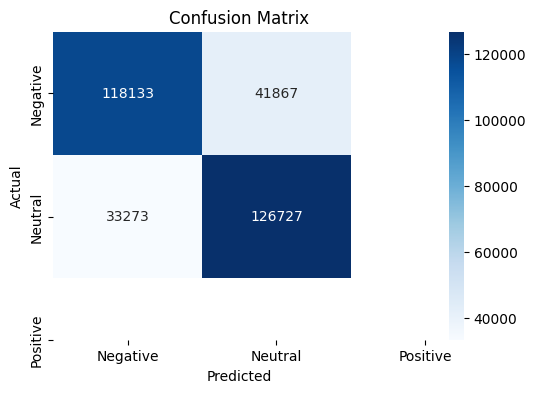

In [58]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
#classification report
#First, check unique values
print("Unique in y_test:", y_test.unique())
print("Unique in y_pred:", np.unique(y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])) #since we got negative and positive as unique values

Unique in y_test: ['Negative' 'Positive']
Unique in y_pred: ['Negative' 'Positive']
Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76    160000
    Positive       0.75      0.79      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



##Write-up:-
- Model Chosen:

  I chose Logistic Regression because it is simple, fast, and works well for text classification tasks like sentiment analysis. It also gives good performance when combined with TF-IDF features.

- How TF-IDF Helped:

  TF-IDF helped convert tweets into numbers based on how important each word is. It gave more weight to meaningful words and ignored common ones like "the", "and", etc. This helped the model focus on the important parts of each tweet.

- Challenges Faced & Solutions:

  One challenge was cleaning the raw tweets — they had URLs, @mentions, hashtags, and special characters. I removed these using regular expressions and string functions.
  Another issue was loading the dataset everytime beacause it was larger almost 90MB.So main issue was handling the size and encoding of the dataset. The file had special characters, so I changed the encoding to ISO-8859-1 while loading.